In [27]:
import warnings
warnings.filterwarnings('ignore')

import random
import numpy as np
from numpy import random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('font', family='Malgun Gothic')      #한글 폰트설정
plt.rcParams['axes.unicode_minus']=False      #마이너스 부호 출력 설정

## 1차원 데이터

In [28]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [29]:
scores = np.array(df.english)[:10]   #배열로 바꾼 후 가져오기
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [30]:
df_s = pd.DataFrame({'score':scores}, index=pd.Index(list('ABCDEFGHIJ')))
df_s.index.name = 'student'
df_s

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [31]:
# 평균값
sum(scores)/len(scores)     #배열
np.mean(scores)     #배열-넘파이 함수

df_s.mean()         #데이터프레임

score    55.0
dtype: float64

In [32]:
# 중앙값
np.median(scores)      #배열
df_s.median()          #데이터프레임

score    56.5
dtype: float64

<AxesSubplot:ylabel='Frequency'>

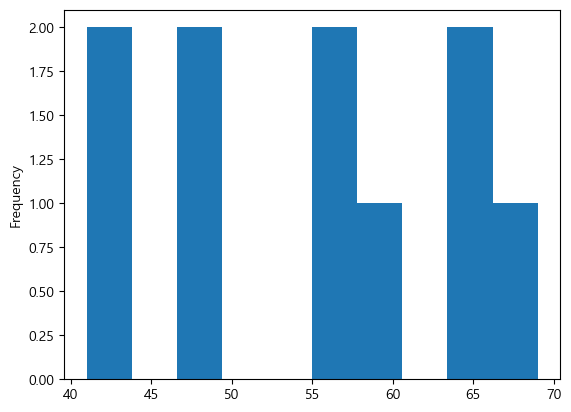

In [33]:
df_s.score.plot(kind='hist')

In [34]:
# 함수 없이 중앙값 구하기 (데이터프레임의 경우)
a = df_s.sort_values('score')

if len(a)%2==0:    #길이가 짝수일 땐 가운데 2개 데이터의 평균을 중앙값으로 함
    i = int(len(a)/2)
    med = (a.iloc[i]+a.iloc[i-1])/2
else:
    med = int(a.iloc[len(a)/2]-0.5)
    
med

score    56.5
dtype: float64

In [35]:
# (배열의 경우)
sorted_sco = np.sort(scores)
n = len(sorted_sco)

if n%2==0:
    m1 = sorted_sco[n//2-1]
    m2 = sorted_sco[n//2]
    med = (m1+m2) / 2
else:
    med = sorted_sco[(n+1)//2-1]
    
med

56.5

In [36]:
# 최빈값 (가장 많이 언급된 값)
df_s.mode()

,score
0,65


In [37]:
from scipy import stats
arr = np.array([1, 2, 2, 3, 3, 3, 4, 4, 5])

mode = stats.mode(arr)  #배열, 데이터프레임 모두 가능
mode = stats.mode(df_s)
mode

ModeResult(mode=array([[65]], dtype=int64), count=array([[2]]))

In [38]:
pd.Series(sorted_sco).mode()    #배열->시리즈 의 최빈값

0    65
dtype: int64

In [39]:
df_s.describe()

,score
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


<AxesSubplot:xlabel='score', ylabel='Count'>

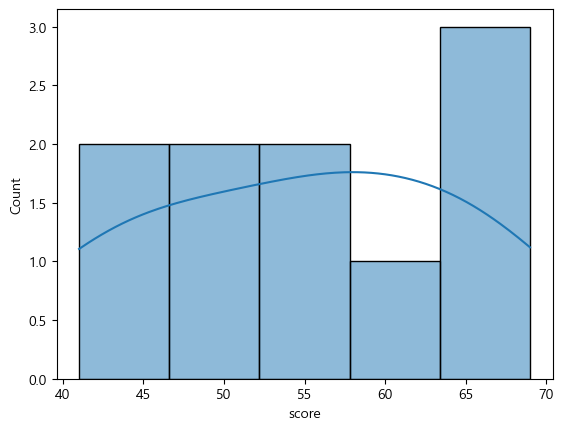

In [40]:
sns.histplot(data=df_s, x='score',kde=True)

<AxesSubplot:xlabel='score', ylabel='Count'>

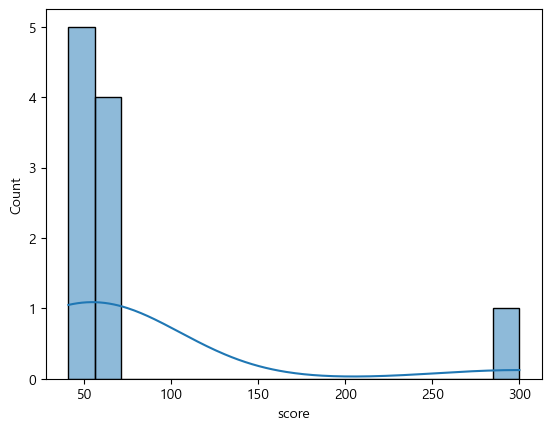

In [41]:
# 평균값 > 중앙값
df_b = df_s.copy()
df_b.iloc[9,0] = 300     #엄청 큰 수가 들어가면 평균이 중앙값 오른쪽에 위치
sns.histplot(data=df_b, x='score',kde=True)

In [42]:
df_b.describe()

,score
count,10.000000
mean,79.200000
std,78.187524
min,41.000000
25%,48.250000
50%,56.500000
75%,65.000000
max,300.000000


<AxesSubplot:xlabel='score', ylabel='Count'>

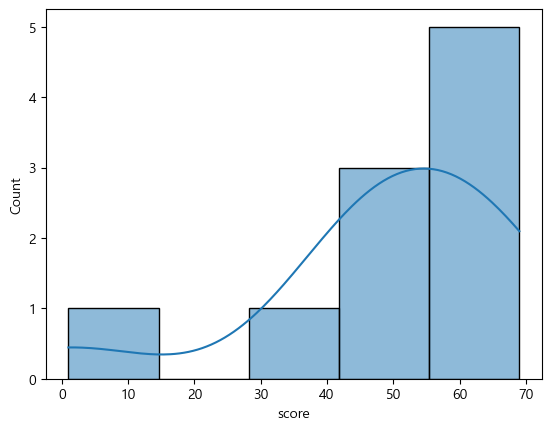

In [43]:
# 평균값 < 중앙값
df_b = df_s.copy()
df_b.iloc[9,0] = 1     #엄청 작은 수가 들어가면 평균이 중앙값 왼쪽에 위치
sns.histplot(data=df_b, x='score',kde=True)

In [44]:
df_b.describe()

,score
count,10.000000
mean,49.300000
std,19.556471
min,1.000000
25%,43.500000
50%,52.500000
75%,63.000000
max,69.000000


### 분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산. 
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof=0이라고 설정, 불편분산은 ddof=1일 때 해당됨
 
#### [표본분산이 분산을 과소평가하는 이유]
- 분산은 '데이터와 평균값의 간의 거리' 이므로 모평균 간의 거리를 계산 : np.sum((fish_data - mean)**2)/N  
- 호수안에 물고기가 7마리: 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링 3마리 {1,2,3} 표본평균 2  
- 이때 분산은 모평균을 모르기 때문에 표본평균과의 거리를 계산하며 분산을 과소평가 하게된다.
- 표본 분산 보다 조금 더 큰 값이 되도록 보정하기 위하여 N 대신 N-1로 나누어 불편분산을 구할 수 있다.

In [45]:
# 데이터의 산포도 지표
# 분산과 표준편차

mean = np.mean(scores)
print(mean)
print(scores)

deviation = scores-mean   #편차
print(deviation)
print(sum(deviation))     #모든 편차의 합은 0

deviation**=2
deviation = np.mean(deviation)**0.5    #루트(제곱근)
print(deviation)    #표준편차(편차들의 제곱의 평균의 제곱근(루트))

55.0
[42 69 56 41 57 48 65 49 65 58]
[-13.  14.   1. -14.   2.  -7.  10.  -6.  10.   3.]
0.0
9.273618495495704


In [46]:
# 넘파이: 표본분산
np.mean(scores-mean**2)     #식으로 구하는 분산
np.var(scores)     #분산을 구하는 함수

86.0

In [47]:
# 판다스: 불편분산
df_s.var()

score    95.555556
dtype: float64

In [48]:
np.var(scores, ddof=0)    #넘파이-표본분산(디폴트값)
np.var(scores, ddof=1)    #넘파이-불편분산

95.55555555555556

In [49]:
df_s.var(ddof=1)    #판다스-불편분산(디폴트값)
df_s.var(ddof=0)    #판다스-표본분산

score    86.0
dtype: float64

In [50]:
#표준편차: 분산의 제곱근(루트)
np.sqrt(np.var(scores, ddof=0))      # np.sqrt(): 루트
np.std(scores)       #표준편차 구하는 함수

9.273618495495704

In [51]:
# 범위와 4분위수
np.max(scores) - np.min(scores)    #범위

scores_q1 = np.percentile(scores,25)    # 1분위수
scores_q3 = np.percentile(scores,75)    # 3분위수
scores_iqr = scores_q3-scores_q1    #이상치 범위 구할 때 사용하는 iqr

scores_q1, scores_q3, scores_iqr

(48.25, 63.25, 15.0)

In [52]:
type(scores)

numpy.ndarray

In [53]:
pd.DataFrame(scores).describe()

,0
count,10.000000
mean,55.000000
std,9.775252
min,41.000000
25%,48.250000
50%,56.500000
75%,63.250000
max,69.000000


In [54]:
# 데이터의 정규화
print(scores)
print(f"평균: {scores.mean()}, 표준편차: {scores.std().round(4)}")

[42 69 56 41 57 48 65 49 65 58]
평균: 55.0, 표준편차: 9.2736


In [55]:
# 표준화: 데이터들을 표준정규분포에 맞게 처리
z = (scores - np.mean(scores)) / np.std(scores)   # (각각의 값-평균) / 표준편차
z    #각각의 편차를 표준편차로 나눈값

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [56]:
55.0 + (z*scores.std())    #거꾸로 계산해서 다시 원래 배열로 돌리기

array([42., 69., 56., 41., 57., 48., 65., 49., 65., 58.])

In [57]:
# 데이터의 시각화
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [58]:
# 도수분포표
freq, bins = np.histogram(english_scores, bins=10, range=(0,100))    #1~100을 10개 구간으로 분할
freq    #각 구간에 속한 값의 빈도수

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [59]:
freq_class = [f'{i}~{i+10}'for i in range(0,100,10)]
freq_dist_df =pd.DataFrame({'frequency': freq}, index=pd.Index(freq_class, name='class'))
freq_dist_df     #도수분포표

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


<AxesSubplot:ylabel='Frequency'>

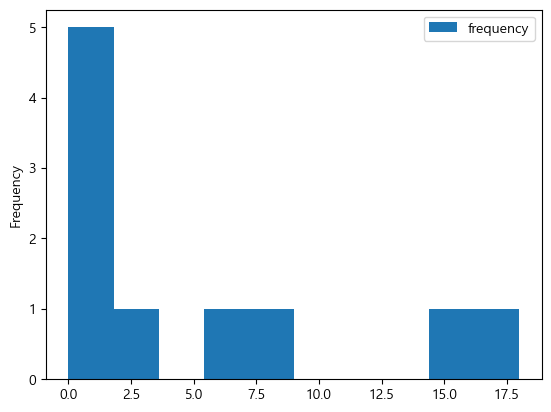

In [60]:
freq_dist_df.plot(kind='hist')

<AxesSubplot:xlabel='frequency', ylabel='Count'>

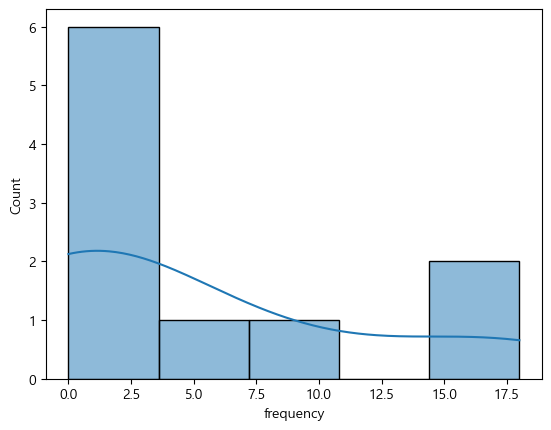

In [61]:
sns.histplot(data=freq_dist_df, x='frequency', kde=True)

In [62]:
# 계급값: 각 계급을 대표하는 값 (계급의 중앙값이 이용됨)
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [63]:
# 상대도수: 해당 계급 데이터의 상대적인 비율
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [64]:
# 누적 상대도수: 해당 계급까지의 상대도수들의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [65]:
freq_dist_df['class_value'] = class_value
freq_dist_df['relative_frequency'] = rel_freq
freq_dist_df['cumulative_freqency'] = cum_rel_freq
freq_dist_df = freq_dist_df[['class_value', 'frequency', 'relative_frequency', 'cumulative_freqency']]
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_freqency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [66]:
# 최빈값
freq_dist_df.loc[freq_dist_df.frequency.idxmax(), 'class_value']   #idxmax():최대값 인덱스(행) 반환

65

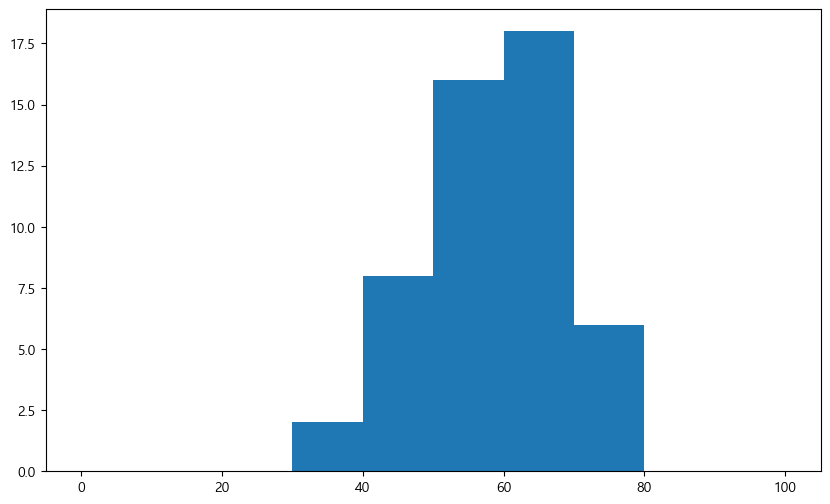

In [67]:
plt.figure(figsize=(10,6))
freq, _, _ = plt.hist(english_scores, bins=10, range=(0,100))
plt.show()

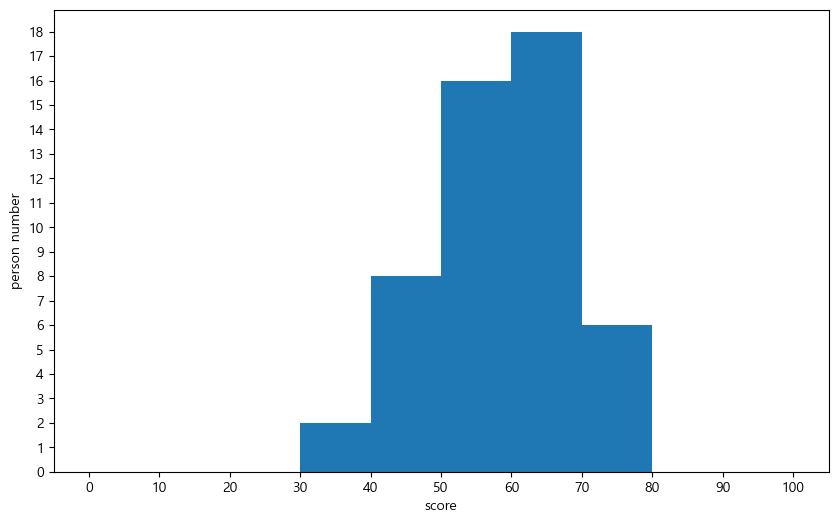

In [68]:
# 히스토그램: 도수분포표를 막대그래프로 표현
plt.figure(figsize=(10,6))
freq, _, _ = plt.hist(english_scores, bins=10, range=(0,100))

plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 100, 10+1))
plt.yticks(np.arange(0, freq.max()+1))

plt.show()

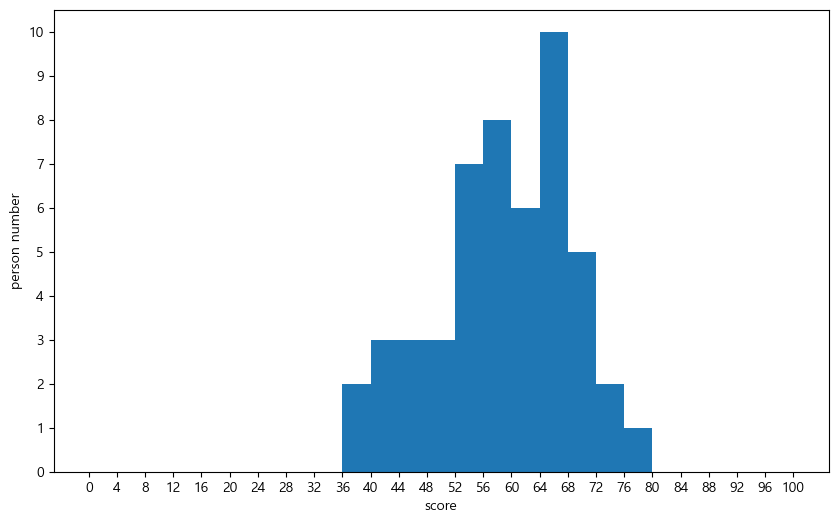

In [69]:
plt.figure(figsize=(10,6))
freq, _, _ = plt.hist(english_scores, bins=25, range=(0,100))

plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 100, 25+1))    #bins에 맞춰서 bins+1로 설정해줘야 잘 나옴
plt.yticks(np.arange(0, freq.max()+1))

plt.show()

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.04 0.06 0.06 0.06 0.14
 0.16 0.12 0.2  0.1  0.04 0.02 0.   0.   0.   0.   0.  ]


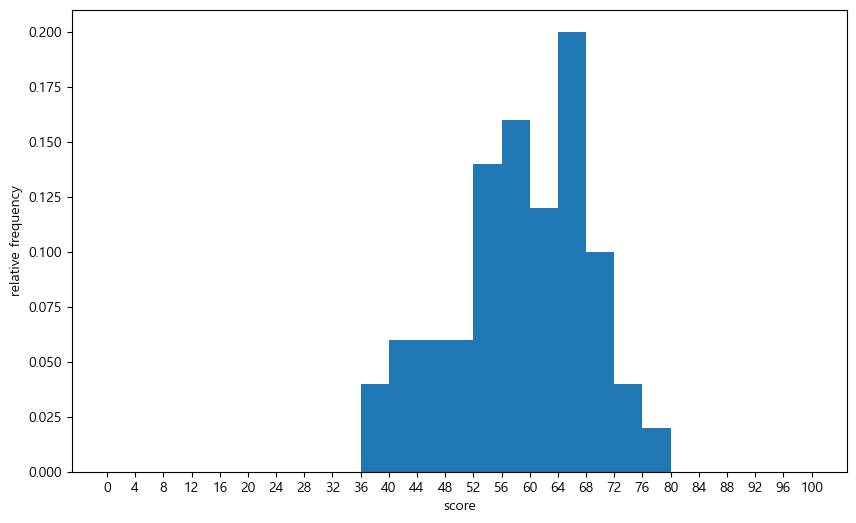

In [70]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)

weights = np.ones_like(english_scores) / len(english_scores)
rel_freq, _, _ = ax1.hist(english_scores, bins=25,
                          range=(0, 100), weights=weights)
print(rel_freq)
ax1.set_xlabel('score')
ax1.set_ylabel('relative frequency')
ax1.set_xticks(np.linspace(0, 100, 25+1))
plt.show()

In [71]:
freq_dist_df

,class_value,frequency,relative_frequency,cumulative_freqency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


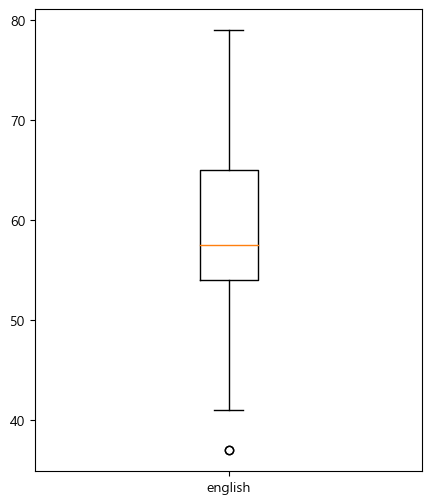

In [72]:
# box plot
plt.figure(figsize=(5,6))
plt.boxplot(english_scores, labels=['english'])
plt.show()

In [73]:
english_scores = np.array(df.english)
pd.Series(english_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

#### 과제(1): 클래스별 빈도를 나타내는 히스토그램에 누적상대도수(cumulative_freqency)를 (y축 오른쪽에 누적상대도수, 왼쪽엔 그냥 값)추가하여 꺾은 선 그래프로 표현

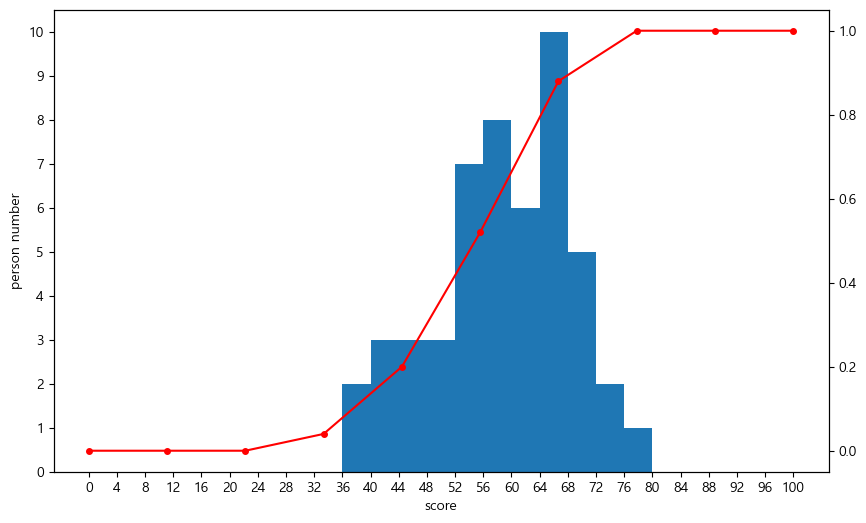

In [74]:
plt.figure(figsize=(10,6))
freq, _, _ = plt.hist(english_scores, bins=25, range=(0,100))

plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 100, 25+1))
plt.yticks(np.arange(0, freq.max()+1))

ax2=plt.twinx()    # y축 분리된 그래프 따로 만들어서 합치기
x=np.linspace(0, 100, 10)
y=freq_dist_df['cumulative_freqency']
ax2.plot(x,y, color='red', marker='o', markersize=4)

plt.show()

## 복습

In [75]:
df = pd.read_csv('../dataset/titanic3.csv',encoding='euc-kr')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [76]:
df.fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [77]:
df.fare.mean()    
df.fare.std()
df.fare.median()

14.4542

<AxesSubplot:ylabel='Frequency'>

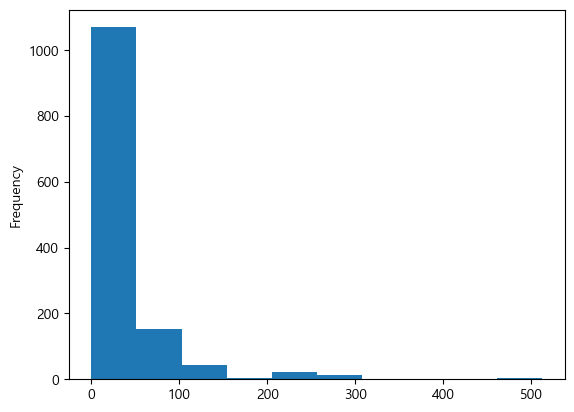

In [78]:
df.fare.plot(kind='hist')

In [79]:
df.fare.mode()   #최빈값

0    8.05
Name: fare, dtype: float64

<AxesSubplot:xlabel='fare', ylabel='Count'>

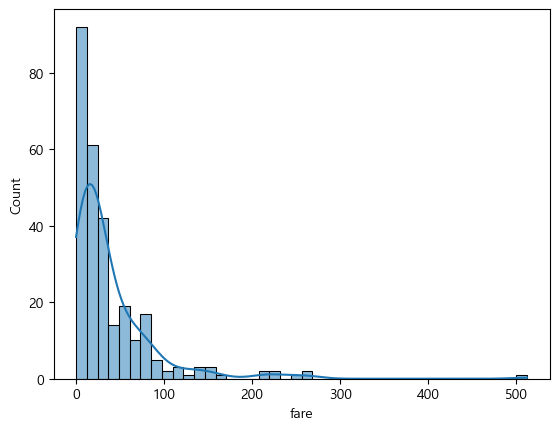

In [80]:
lifare = df['fare'].tolist()
sfare = set(lifare)
fdf = pd.DataFrame(sfare, columns=['fare'])

sns.histplot(data=fdf, x='fare', kde=True)

In [81]:
print(df.fare.median())    #중앙값
print(df.fare.mean())      #평균

# 평균이 중앙값 왼쪽으로 있음 -> 왼쪽으로 쏠린 그래프

14.4542
33.29547928134572


14.4542
33.29547928134572


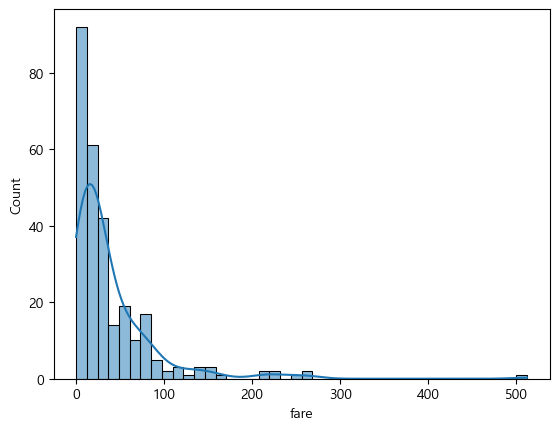

In [82]:
df.fare.mode()   #최빈값

lifare = df['fare'].tolist()
sfare = set(lifare)
fdf = pd.DataFrame(sfare, columns=['fare'])

sns.histplot(data=fdf, x='fare', kde=True)

print(df.fare.median())    #중앙값
print(df.fare.mean())      #평균

# 평균이 중앙값 왼쪽으로 있음 -> 왼쪽으로 쏠린 그래프

In [83]:
# 편차 구하기
dev = df.fare - df.fare.mean()    #각각의 편차
sumdev = dev.sum()   #모든 편차들의 합은 0
d = (dev**2).mean() ** 0.5    #표준편차 (편차 제곱의 평균의 제곱근)

d = np.std(df.fare)    #표준편차 함수(넘파이)
d = df.fare.std()      #표준편차 함수(판다스)
print(d)

51.758668239174135


In [84]:
# 분산구하기
df.fare.var()      #불편분산(판다스)
np.var(df.fare)    #표본분산(넘파이)

df.fare.var(ddof=0)        #표본분산(판다스)
np.var(df.fare, ddof=1)    #불편분산(넘파이)

2678.9597378928934

In [85]:
idx = df[df['fare']==0]
df = df.drop(idx.index)

In [86]:
df.fare.describe()

count    1291.000000
mean       33.733917
std        51.956349
min         3.170800
25%         7.925000
50%        14.500000
75%        31.331250
max       512.329200
Name: fare, dtype: float64

In [87]:
df.fare.max() - df.fare.min()    #범위

509.15840000000003

In [88]:
df = df.dropna(subset=['fare'])

In [89]:
a = np.array(df.fare)
scores_q1 = np.percentile(a,25)
scores_q3 = np.percentile(a,75)
iqr = (scores_q3-scores_q1)*1.5

scores_q1-iqr   #로우 휘스커(이상치)
scores_q3+iqr   #어퍼 휘스커(이상치)

66.44062499999998

In [90]:
a = df.sort_values('fare')
i = len(a)//2

if len(a)%2==0:
    m1 = a.fare.iloc[i]
    m2 = a.fare.iloc[i-1]
    print(m1,m2)
    med = (a.fare.iloc[i]+a.fare.iloc[i-1])/2
else:
    med = a.fare.iloc[i]
    
med    #중앙값

14.5

In [91]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 과제(2): 타이타닉 age, pclass, fare, sex, embarked 중 2개를 선택해 각 칼럼 특징을 설명하고 종속변수 survived와의 관계를 서술
- 전처리 후 기초통계량, 시각화를 통한 분포 및 특징 탐색, 이상치 여부 탐색
- 선택한 컬럼을 잘 활용할 수 있는 형태로 변환


In [92]:
df = pd.read_csv('../dataset/titanic3.csv',encoding='euc-kr')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [93]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [94]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [95]:
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


#### fare
- 평균(33.295479)과 중앙값(14.454200)의 차이가 큰 편
    - 특히 max값이 512.329200로 평균과 차이가 많이 나는 것을 볼 수 있음
    - 박스 플랏을 보면 upper whisker가 아주 많은 것을 볼 수 있음
- 왼쪽으로 극적으로 치우친 그래프
- 이상치 범위: 66.34 ~
    - lower whisker는 없음/ upper whisker만 171개

#### age
- 평균(29.892983)과 중앙값(30)이 큰 차이가 없음
- 최소, 최댓값을 고려하면 왼쪽으로 다소 치우친 그래프임을 알 수 있음
- 이상치 범위: ~ 0.44 / 57.34 ~
    - 최고령자가 80이라는 걸 생각하면 이상치가 생각보다 많이 나옴
- 주로 20~40대에 사람들이 많이 몰렸다는 걸 볼 수 있음 (상대도수 그래프 참고)

In [96]:
#나이 nan처리
df['age'].replace(np.nan, 1000, inplace=True)
ix = df['age']!=1000
ix2 = df['age']==1000
ix3 = df['sex']=='female'
ix4 = df['sex']=='male'

idx1 = df['name'].str.contains('Miss. ')   #미혼 여성
idx2 = df['name'].str.contains('Mrs. ')    #기혼 여성
idx3 = df['name'].str.contains('Dr. ')     #의사
idx4 = df['name'].str.contains('Master. ') #남자
idx6 = df['name'].str.contains('Mr. ')     #남자
idx7 = df['name'].str.contains('Ms. ')     #여자

miss = df['age'][idx1&ix].mean()
mrs = df['age'][idx2&ix].mean()
dr1 = df['age'][idx3&ix&ix3].mean()
dr2 = df['age'][idx3&ix&ix4].mean()
master = df['age'][idx4&ix].mean()
mr = df['age'][idx6&ix].mean()
ms = df['age'][idx7&ix].mean()

df['age'][idx1&ix2] = miss
df['age'][idx2&ix2] = mrs
df['age'][idx3&ix2&ix3] = dr1
df['age'][idx3&ix2&ix4] = dr2
df['age'][idx4&ix2] = master
df['age'][idx6&ix2] = mr
df['age'][idx7&ix2] = ms

#요금 nan처리
df.fare.replace(np.nan, df['fare'].mean(), inplace=True)

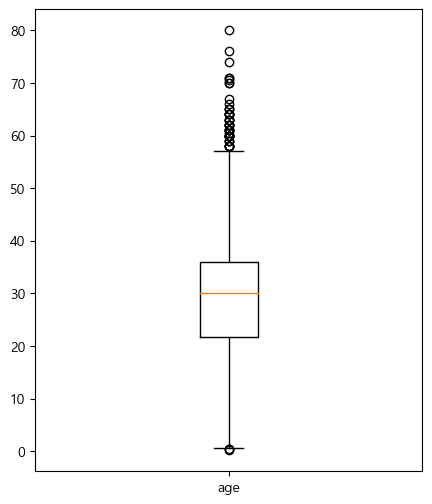

In [97]:
plt.figure(figsize=(5,6))
plt.boxplot(df.age, labels=['age'])
plt.show()

In [98]:
#이상치 탐색 방법 2가지
q1 = np.percentile(df.age,25)
q3 = np.percentile(df.age,75)
iqr15 = (q3-q1)*1.5
abv = df[(df['age'] <= q1-iqr15) | (df['age'] >= q3+iqr15)]

q1 = df.age.describe()['25%']
q3 = df.age.describe()['75%']
iqr = q3 - q1
abv = df[(df['age'] <= q1-(iqr*1.5)) | (df['age'] >= q3+(iqr*1.5))]

print(f"이상치: ~{(q1-(iqr*1.5)).round(2)} / {(q3+(iqr*1.5)).round(2)}~")
len(abv)
# 단, 이상치 개수가 많은 편이고, 부적절한 데이터라 생각될 정도의 이상치도 아니므로
# 삭제 처리는 하지 않음
# 그냥 타이타닉 평균 나이대~ 등을 파악할 때 참고하는 정도

이상치: ~0.44 / 57.34~


52

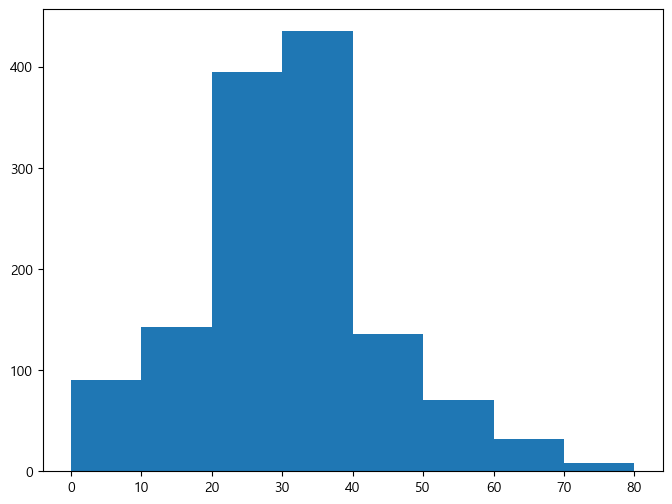

In [99]:
plt.figure(figsize=(8,6))
freq, _, _ = plt.hist(df.age, bins=8, range=(0,80))

freq, _ = np.histogram(df.age, bins=8, range=(0,80))   #각 구간 값 개수count

In [100]:
dfage = pd.DataFrame()
dfage['calss_v'] = [(i+(i+10))//2 for i in range(0,80,10)]   #계급값

freq, _ = np.histogram(df.age, bins=8, range=(0,80))   #각 구간 값 개수count
dfage['frequency'] = freq   #각 계급별 빈도수(개수)

dfage['rel_freq'] = freq/freq.sum()    #상대도수(해당 계급 데이터의 상대적인 비율)
dfage['cum_freq'] = np.cumsum(dfage.rel_freq)   # 누적 상대도수

dfage

,calss_v,frequency,rel_freq,cum_freq
0,5,90,0.068755,0.068755
1,15,143,0.109244,0.177998
2,25,395,0.301757,0.479756
3,35,435,0.332315,0.812070
4,45,136,0.103896,0.915966
5,55,70,0.053476,0.969442
6,65,32,0.024446,0.993888
7,75,8,0.006112,1.000000


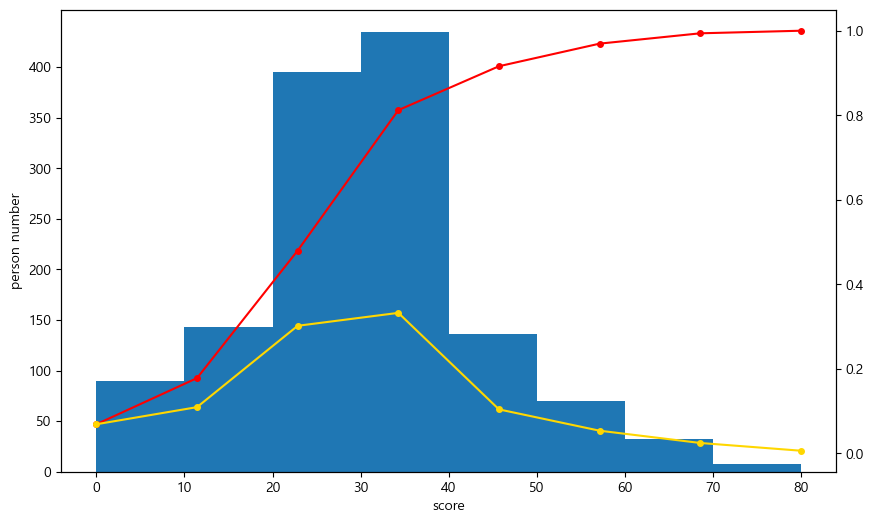

In [101]:
plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(df.age, bins=8, range=(0,80))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 80, 8+1))
plt.yticks(np.arange(0, freq.max()+1, 50))

ax2=plt.twinx()
x=np.linspace(0, 80, 8)
y=dfage['cum_freq']
ax2.plot(x,y, color='red', marker='o', markersize=4)    #누적상대도수

plt.plot(x, dfage.rel_freq, color='gold', marker='o', markersize=4)   #상대도수

plt.show()

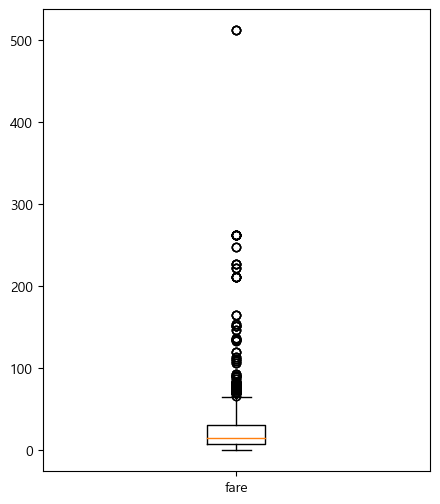

In [102]:
plt.figure(figsize=(5,6))
plt.boxplot(df.fare, labels=['fare'])
plt.show()

In [103]:
#이상치 탐색
q1 = np.percentile(df.fare,25)
q3 = np.percentile(df.fare,75)
iqr15 = (q3-q1)*1.5
abv = df[(df['fare'] <= q1-iqr) | (df['fare'] >= q3+iqr)]

print(f"이상치: ~{(q1-(iqr*1.5)).round(2)} / {(q3+(iqr*1.5)).round(2)}~")
len(abv)
# 이상치가 아주 많음
# 특히 upper whisker 범위가 너무 넓음

이상치: ~-13.44 / 52.61~


255

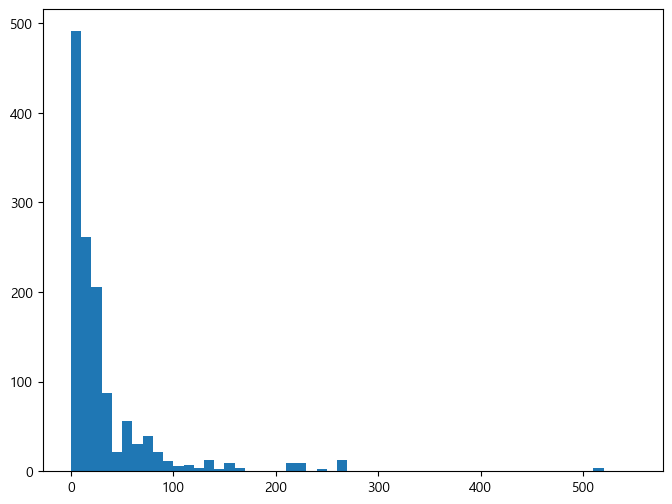

In [104]:
plt.figure(figsize=(8,6))
freq, _, _ = plt.hist(df.fare, bins=55, range=(0,550))

freq, _ = np.histogram(df.fare, bins=11, range=(0,550))   #각 구간 값 개수count

In [105]:
dfare = pd.DataFrame()
dfare['calss_v'] = [(i+25) for i in range(0,550,50)]   #계급값

freq, _ = np.histogram(df.fare, bins=11, range=(0,550))   #각 구간 값 개수count
dfare['frequency'] = freq   #각 계급별 빈도수(개수)

dfare['rel_freq'] = freq/freq.sum()    #상대도수(해당 계급 데이터의 상대적인 비율)
dfare['cum_freq'] = np.cumsum(dfare.rel_freq)   # 누적 상대도수

dfare

,calss_v,frequency,rel_freq,cum_freq
0,25,1067,0.815126,0.815126
1,75,158,0.120703,0.935829
2,125,33,0.025210,0.961039
3,175,13,0.009931,0.970970
4,225,21,0.016043,0.987013
5,275,13,0.009931,0.996944
6,325,0,0.000000,0.996944
7,375,0,0.000000,0.996944
8,425,0,0.000000,0.996944
9,475,0,0.000000,0.996944


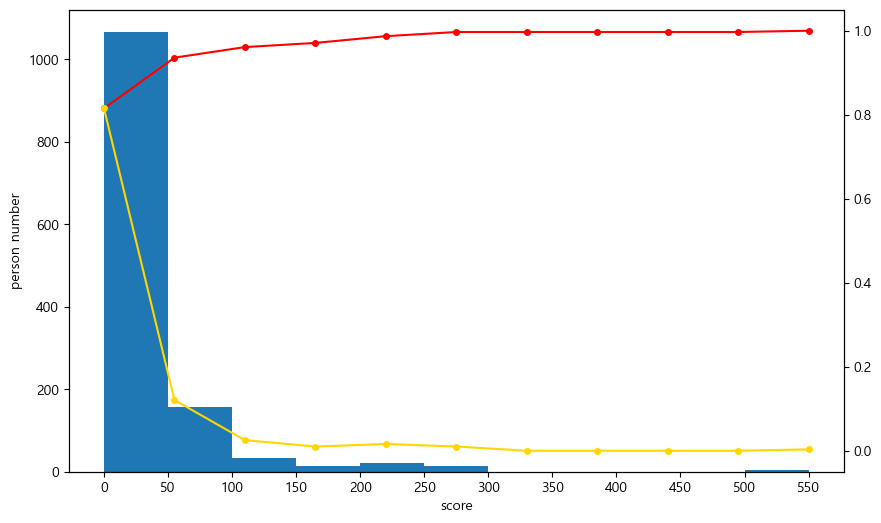

In [106]:
plt.figure(figsize=(10,6))

freq, _, _ = plt.hist(df.fare, bins=11, range=(0,550))
plt.xlabel('score')
plt.ylabel('person number')
plt.xticks(np.linspace(0, 550, 11+1))
plt.yticks(np.arange(0, freq.max()+1, 200))

ax2=plt.twinx()
x=np.linspace(0, 550, 11)
y=dfare['cum_freq']
ax2.plot(x,y, color='red', marker='o', markersize=4)    #누적상대도수

plt.plot(x, dfare.rel_freq, color='gold', marker='o', markersize=4)   #상대도수

plt.show()

# 초반에 극히 치우친 데이터

## 2차원 데이터

In [107]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [108]:
en_scores = np.array(df['english'])[:10]
ma_scores = np.array(df['mathematics'])[:10]

scores_df = pd.DataFrame({'english':en_scores, 'math':ma_scores}, index=pd.Index(list('ABCDEFGHIJ'), name='student'))
scores_df

,english,math
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76
F,48,60
G,65,81
H,49,66
I,65,78


In [109]:
# 공분산: 두 변수가 함께 변화하는 경향을 나타내는 통계적 척도
summary_df = scores_df.copy()

summary_df['english_deviation'] = summary_df.english - summary_df.english.mean()   #편차
summary_df['math_deviation'] = summary_df.math - summary_df.math.mean()   #편차

summary_df['product of deviation'] = summary_df['english_deviation']*summary_df['math_deviation']
#두 편차를 곱한 값 -> 공분산

summary_df

,english,math,english_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


#### 공분산: 두 변수가 함께 변화하는 경향을 나타내는 통계적 척도
- 공분산이 양수인 경우 한 변수가 증가할 때 다른 변수도 증가하는 경향이 있으며, 
- 음수인 경우 한 변수가 증가할 때 다른 변수는 감소하는 경향이 있습니다. 
- 공분산이 0에 가까운 경우 두 변수 사이에는 거의 상관관계가 없다고 볼 수 있습니다.

In [110]:
np.var(scores_df.english)    #분산

86.0

In [111]:
summary_df['product of deviation'].mean()    #공분산 평균

62.8

In [112]:
np.cov(en_scores, ma_scores, ddof=1)    #영어분산, 공분산 / 공분산, 수학분산
np.cov(en_scores, ma_scores, ddof=0)
# ddpf=1: n-1로 나누기(불편분산)
# ddpf=0: n으로 나누기(표본분산) -> 디폴트

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [113]:
# 상관계수: 공분산 / (영어 표준편차 * 수학 표준편차)
np.cov(en_scores, ma_scores, ddof=0)[0,1] / (np.std(en_scores) * np.std(ma_scores))

0.8185692341186713

In [114]:
np.corrcoef(en_scores, ma_scores)    #상관계수 구하는 함수

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [115]:
scores_df.corr()    #상관계수 보는 함수

,english,math
english,1.000000,0.818569
math,0.818569,1.000000


#### 과제(3): 타이타닉에서 2개 선택, 공분산 행렬 및 상관계수 행렬 탐색
- 이런 건 연속형에서나 쓸 수 있는 방법
- 범주형인 데이터들은 빈도분석이 훨씬 유용함
- fare와 pclass는 범주형이지만 동시에 숫자가 의미를 가지므로 가능

In [116]:
df = pd.read_csv('../dataset/titanic3.csv',encoding='euc-kr')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [117]:
pclass = np.array(df['pclass'])
fare = np.array(df['fare'])
survived = np.array(df['survived'])

tt = pd.DataFrame({'pclass':pclass, 'fare':fare, 'survived':survived})
tt.head()

,pclass,fare,survived
0,1,211.3375,1
1,1,151.5500,1
2,1,151.5500,0
3,1,151.5500,0
4,1,151.5500,0


In [118]:
tdf = tt.copy()

tdf['pclass_deviation'] = tdf.pclass - tdf.pclass.mean()
tdf['fare_deviation'] = tdf.fare - tdf.fare.mean()
tdf['survived_deviation'] = tdf.survived - tdf.survived.mean()

tdf['pclass: pod'] = tdf['pclass_deviation']*tdf['survived_deviation']
tdf['fare: pod'] = tdf['fare_deviation']*tdf['survived_deviation']
#두 편차를 곱한 값 -> 공분산

tdf.head()

,pclass,fare,survived,pclass_deviation,fare_deviation,survived_deviation,pclass: pod,fare: pod
0,1,211.3375,1,-1.294882,178.042021,0.618029,-0.800274,110.035137
1,1,151.5500,1,-1.294882,118.254521,0.618029,-0.800274,73.084727
2,1,151.5500,0,-1.294882,118.254521,-0.381971,0.494607,-45.169794
3,1,151.5500,0,-1.294882,118.254521,-0.381971,0.494607,-45.169794
4,1,151.5500,0,-1.294882,118.254521,-0.381971,0.494607,-45.169794


In [119]:
tdf['pclass: pod'].mean()
tdf['fare: pod'].mean()

6.141324280831237

In [120]:
print(np.cov(pclass, survived, ddof=1))
np.cov(fare, survived, ddof=1)

[[ 0.70196919 -0.12724831]
 [-0.12724831  0.23624963]]


array([[       nan,        nan],
       [       nan, 0.23624963]])

In [121]:
np.cov(pclass, survived, ddof=0)[0,1] / (np.std(pclass) * np.std(survived))
np.cov(fare, survived, ddof=0)[0,1] / (np.std(fare) * np.std(survived))

nan

In [122]:
np.corrcoef(pclass, survived)
np.corrcoef(fare, survived)

array([[nan, nan],
       [nan,  1.]])

In [123]:
tdf[['pclass','fare','survived']].corr()

,pclass,fare,survived
pclass,1.000000,-0.558629,-0.312469
fare,-0.558629,1.000000,0.244265
survived,-0.312469,0.244265,1.000000


In [124]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


Text(0, 0.5, 'math')

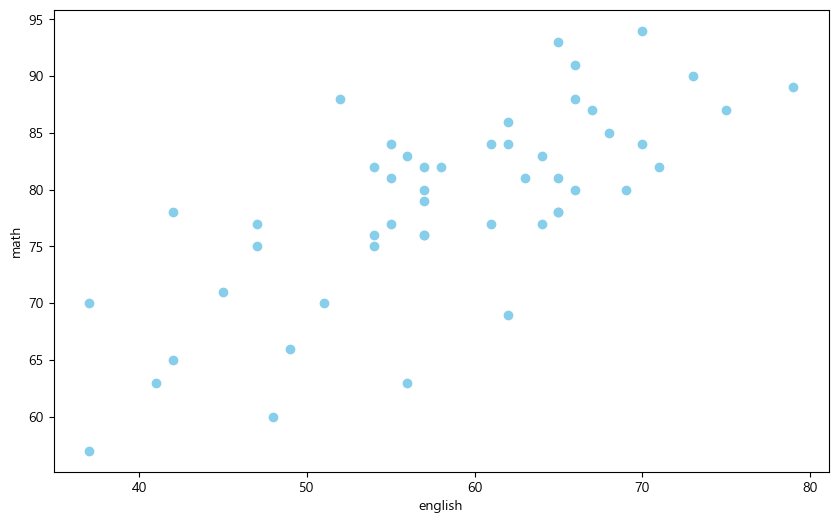

In [125]:
# 2차원 데이터의 시각화
english_scores = np.array(df.english)
math_scores = np.array(df.mathematics)

plt.figure(figsize=(10,6))
plt.scatter(english_scores, math_scores, color='skyblue')
plt.xlabel('english')
plt.ylabel('math')

<AxesSubplot:xlabel='english', ylabel='mathematics'>

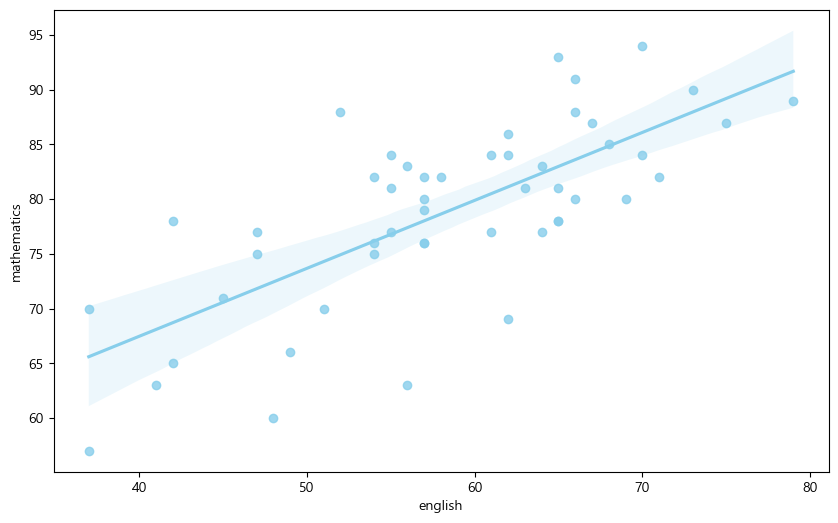

In [126]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='english', y='mathematics', color='skyblue')

In [127]:
#회귀직선 구하기
poly_fit = np.polyfit(english_scores, math_scores, 1)
poly_1d = np.poly1d(poly_fit)
eq = f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x'
eq

'42.60+0.62x'

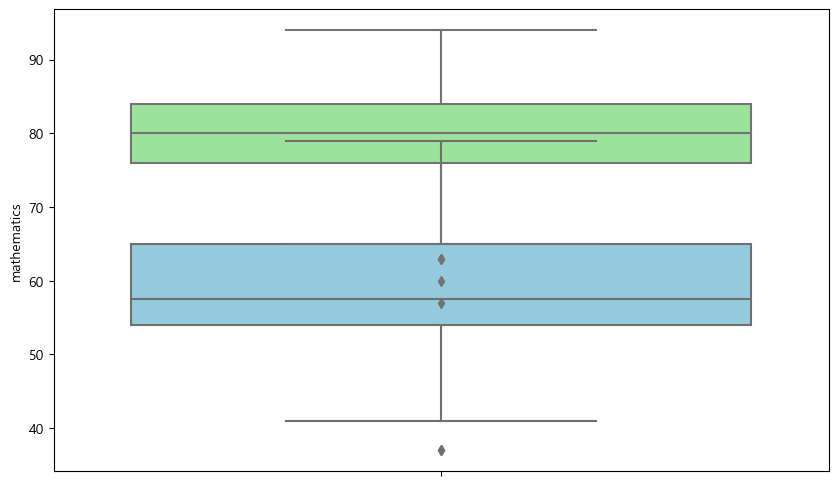

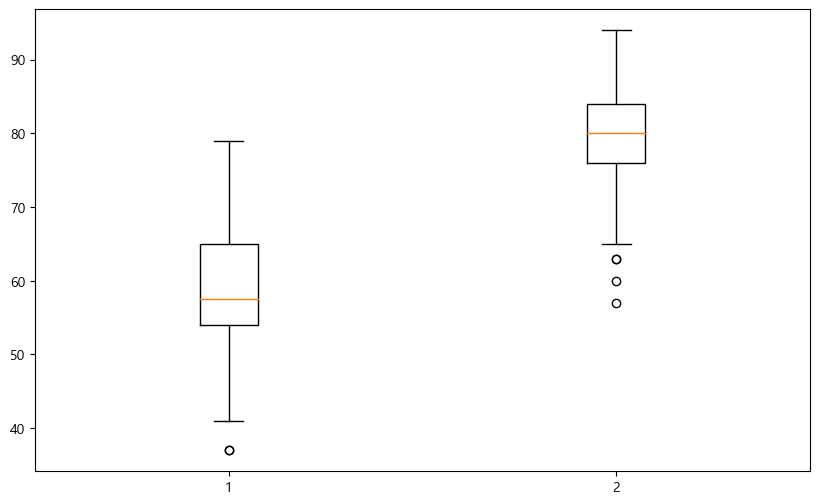

In [128]:
# 박스플랏 2가지 방법(seaborn, matplotlib.pyplot)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, y='english', color='skyblue')
sns.boxplot(data=df, y='mathematics', color='lightgreen')

plt.figure(figsize=(10,6))
plt.boxplot([english_scores,math_scores])
plt.show()

#### 과제(4): english와 mathematics 2차원 데이터간의 관계를 파악할 수 있는 시각화를 수행
- 히스토그램 비교 등등

In [129]:
df = pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


<AxesSubplot:ylabel='Frequency'>

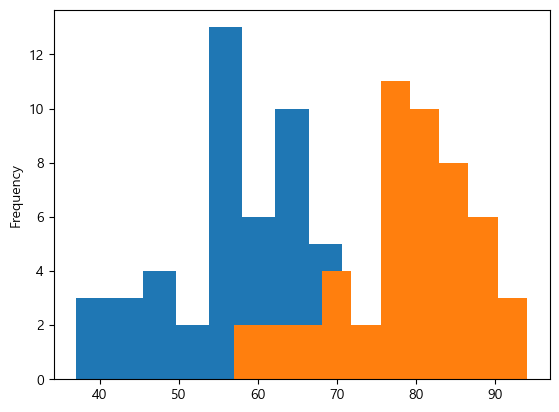

In [130]:
df.english.plot(kind='hist')
df.mathematics.plot(kind='hist')

In [131]:
#### 범주화
def get_score(score):
    cat = ''
    if score < 60: cat='F'
    elif score < 70: cat= 'D'
    elif score < 80: cat='C'
    elif score < 90: cat='B'
    else: cat = 'A'
    return cat

df['english_class'] = df.english.apply(lambda x: get_score(x))
df['math_class'] = df.mathematics.apply(lambda x: get_score(x))

In [132]:
df.head()

,english,mathematics,english_class,math_class
student number,,,,
1,42,65,F,D
2,69,80,D,B
3,56,63,F,D
4,41,63,F,D
5,57,76,F,C


<AxesSubplot:xlabel='math_class', ylabel='count'>

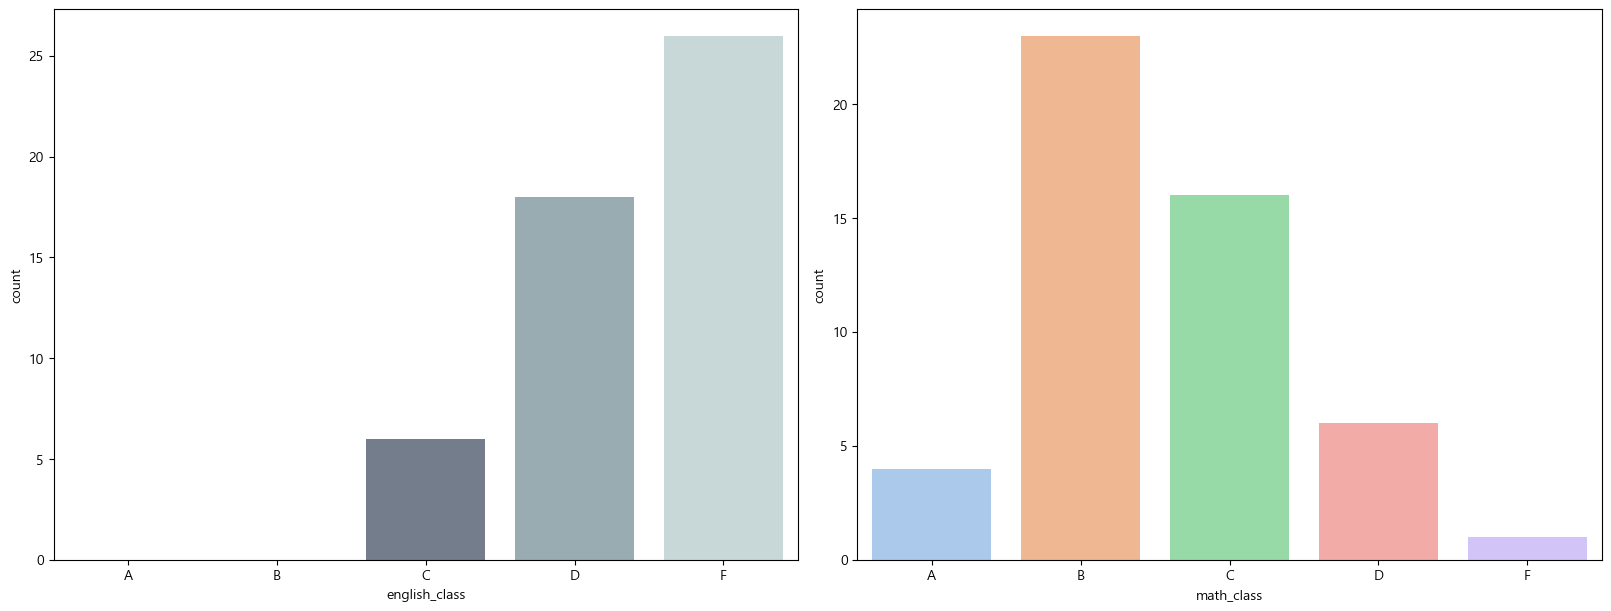

In [133]:
# 각 등급별 인원
order=['A','B','C','D','F']
fig, ax = plt.subplots(ncols=2, figsize=(16,6), constrained_layout=True)
sns.countplot(x='english_class', data=df, palette='bone',order=order, ax=ax[0])
sns.countplot(x='math_class', data=df, palette='pastel',order=order, ax=ax[1])

<AxesSubplot:xlabel='english', ylabel='mathematics'>

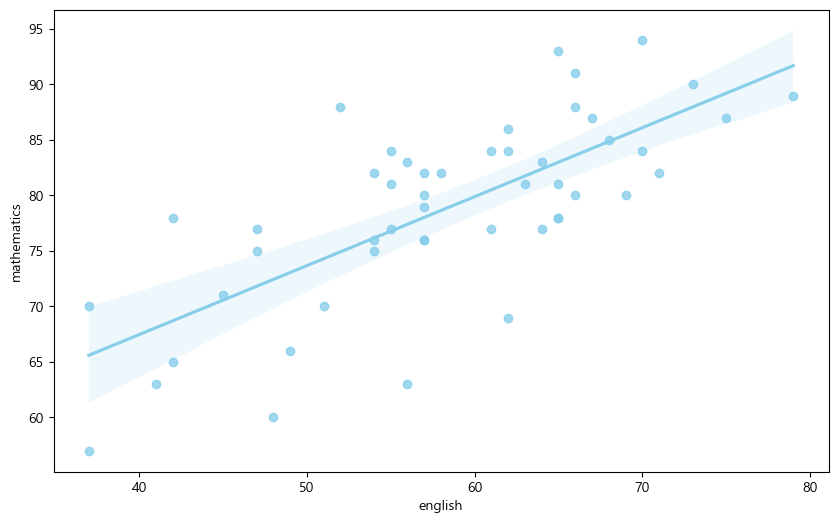

In [134]:
# 스캐터플랏
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='english', y='mathematics', color='skyblue')

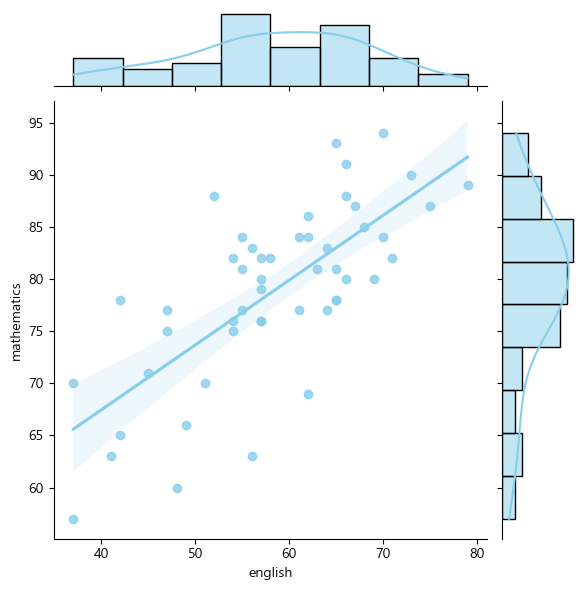

In [135]:
sns.jointplot(data=df, x='english', y='mathematics', color='skyblue', kind='reg')

In [136]:
df1 = df.copy()

def get_per_e(score):
    idx = (df['english'] > score)
    per = int((len(df[idx])/50) *100)
    return per

def get_per_m(score):
    idx = (df['mathematics'] > score)
    per = int((len(df[idx])/50) *100)
    return per
   
df1['english_per'] = df1.english.apply(lambda x: get_per_e(x))
df1['math_per'] = df1.mathematics.apply(lambda x: get_per_m(x))
df1['+-'] = df1.english_per - df1.math_per
df1.head()

,english,mathematics,english_class,math_class,english_per,math_per,+-
student number,,,,,,,
1,42,65,F,D,90,90,0
2,69,80,D,B,12,48,-36
3,56,63,F,D,60,92,-32
4,41,63,F,D,94,92,2
5,57,76,F,C,50,70,-20


In [137]:
df2 = df.drop(['english_class', 'math_class'],axis=1)

df2['english_deviation'] = df2.english - df2.english.mean()   #편차
df2['math_deviation'] = df2.mathematics - df2.mathematics.mean()   #편차

df2['product of deviation'] = df2['english_deviation']*df2['math_deviation']   #공분산
df2.head()

np.cov(df2['mathematics'], df2['english'], ddof=0)   #표본분산
np.cov(df2['mathematics'], df2['english'], ddof=1)   #불편분산

array([[70.80163265, 59.67918367],
       [59.67918367, 96.03632653]])

In [138]:
df2[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000


<AxesSubplot:ylabel='mathematics'>

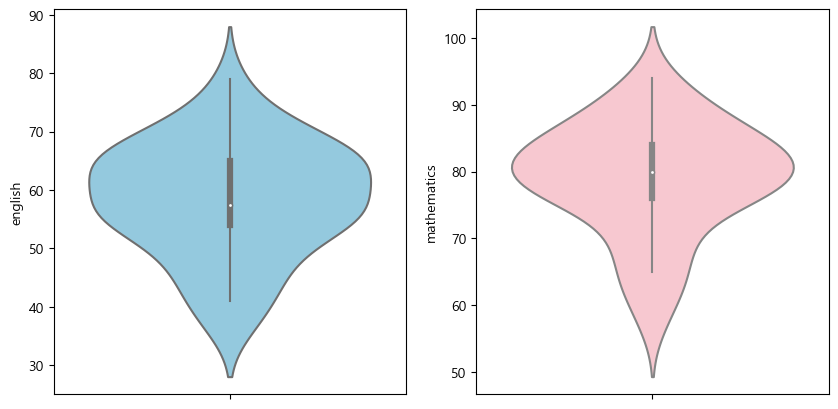

In [139]:
# 바이올린 플랏
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.violinplot(y='english',data=df, color='skyblue', ax=ax[0])
sns.violinplot(y='mathematics',data=df, color='pink', ax=ax[1])

<AxesSubplot:>

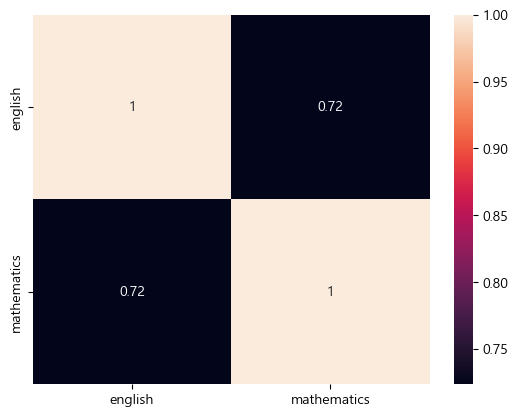

In [140]:
# 히트맵
sns.heatmap(df[['english', 'mathematics']].corr(), annot=True)

In [141]:
df.corr()

,english,mathematics
english,1.000000,0.723741
mathematics,0.723741,1.000000
